# Gene expression (GE) during B cell differentiation

- RNA-seq Data Source: [GSE148924](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148924).
- Code for Heatmap and PCA Plots (Figures 1B and C), using the 'genecounts_all' table as an example.
- [Link to the Published Data](https://www.frontiersin.org/articles/10.3389/fimmu.2022.1030409/full).

In [20]:
# Import Python modules

import pandas as pd
import numpy as np
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
sns.set_style("ticks")

# PCA modules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

- Calculate the mean expression values for genes with the same prefix.



In [5]:
# Define the mean expression function

def mean_data(df):
    items = list(set([c[:-1] for c in df.columns.to_list()]))

    numbers = list(range(0,len(items)))
    data = []
    mean = pd.DataFrame(data)
    for i in numbers:
        cols = [c for c in genecounts_all if c.startswith(items[i])]

        mean[items[i]] = genecounts_all.loc[:,cols].mean(1)
    return mean

- Normalize the input data by replacing infinite values with NaN, dropping any rows containing NaN, and dividing each row by its sum to ensure a normalized expression.

In [16]:
# Define the normalization function

def normalize_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()
    data = data.div(data.sum(axis=1), axis=0)
    return data

In [30]:
# Analyzing count data from RNA-seq generated by DESeq2.
# The count data represents the number of sequence fragments assigned to each gene in each sample.

file_path = 'C:./data/genecounts_all.csv'
genecounts_all = pd.read_csv(file_path, index_col=0)
genecounts_all = genecounts_all.reset_index()
genecounts_all.columns =['GENE_ID', 'Memory_1', 'Memory_2', 'Memory_3', 'Plasmablasts_1', 'Plasmablasts_2', 'Plasmablasts_3', 
                         'Plasmacells_1', 'Plasmacells_2', 'Plasmacells_3', 'Preplasmablasts_1', 'Preplasmablasts_2', 'Preplasmablasts_3']
genecounts_all = genecounts_all.set_index(['GENE_ID'])
genecounts_all.head()

,Memory_1,Memory_2,Memory_3,Plasmablasts_1,Plasmablasts_2,Plasmablasts_3,Plasmacells_1,Plasmacells_2,Plasmacells_3,Preplasmablasts_1,Preplasmablasts_2,Preplasmablasts_3
GENE_ID,,,,,,,,,,,,
A1BG,178.823069,501.169250,56.490040,296.541988,132.324632,47.557679,125.342773,168.224387,120.418916,178.714883,95.093531,29.037105
A1CF,3.236326,2.795629,0.990903,0.000000,2.345013,0.000000,0.000000,0.000000,0.000000,1.809548,0.000000,0.610875
A2M,0.000000,0.000000,0.000000,70.618001,0.701525,41.110653,15.176547,4.693892,42.106815,13.272821,6.676664,36.633996
A2ML1,22.293692,25.569808,70.520581,5.049076,1.246706,0.000000,3.239767,3.390491,5.893050,0.968311,2.332421,9.180305
A3GALT2,4.345738,2.515919,1.950124,0.000000,0.000000,0.000000,0.000000,0.000000,1.211711,0.000000,0.000000,0.000000


In [31]:
# Remove genes with low expression levels (mean expression < 2) from the dataset.

not_expressed = []
for i in genecounts_all.transpose():
    
    if genecounts_all.transpose()[i].mean() < 2:
        not_expressed.append(i)
        
genecounts_all_expressed = genecounts_all.drop(not_expressed)
genecounts_all_expressed.head()

,Memory_1,Memory_2,Memory_3,Plasmablasts_1,Plasmablasts_2,Plasmablasts_3,Plasmacells_1,Plasmacells_2,Plasmacells_3,Preplasmablasts_1,Preplasmablasts_2,Preplasmablasts_3
GENE_ID,,,,,,,,,,,,
A1BG,178.823069,501.169250,56.490040,296.541988,132.324632,47.557679,125.342773,168.224387,120.418916,178.714883,95.093531,29.037105
A2M,0.000000,0.000000,0.000000,70.618001,0.701525,41.110653,15.176547,4.693892,42.106815,13.272821,6.676664,36.633996
A2ML1,22.293692,25.569808,70.520581,5.049076,1.246706,0.000000,3.239767,3.390491,5.893050,0.968311,2.332421,9.180305
A4GALT,24.875298,5.403889,0.798222,4.618273,2.094755,1.056136,0.000000,15.633205,0.000000,60.325892,69.683672,46.809172
AAAS,233.338407,134.803655,360.412429,1440.887820,1352.828686,1537.388951,1791.675655,1531.278288,2190.396782,1048.495108,1473.138294,1380.989929


- Generate a HeatMap using all genes after applying the normalization function.

c:\Users\Bruna Los\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


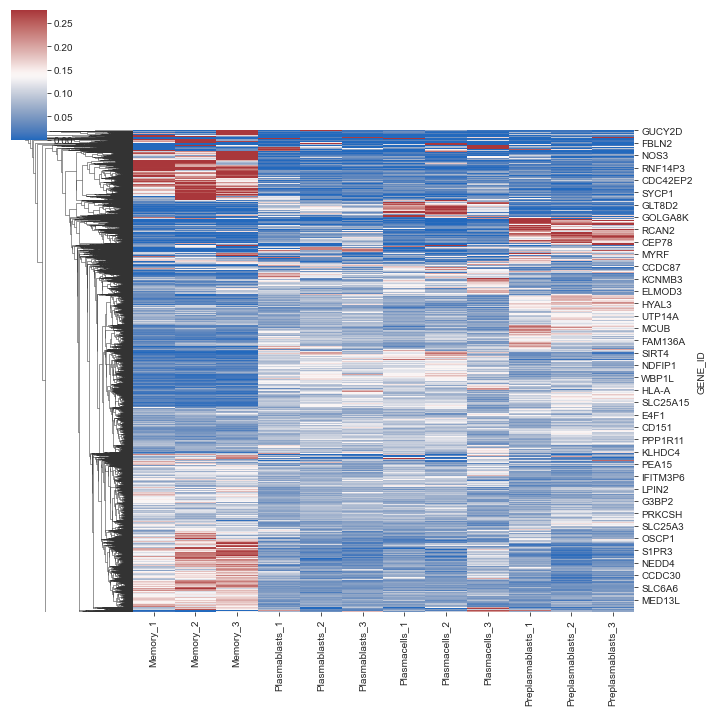

In [32]:
# Heatmap

sns.clustermap(normalize_data(genecounts_all_expressed), robust=True, col_cluster = False, cmap = 'vlag')
#plt.savefig('heatmap.png')

- Perform Principal Component Analysis (PCA) on all genes expressed in at least one subtype of B cells.


In [23]:
GE = genecounts_all.loc[(genecounts_all>1).any(axis=1)]
GE_transposed = GE.transpose()
GE_transposed.reset_index(inplace=True)

#features = list(GE_transposed.columns)# Separating out the features
#x = GE_transposed.loc[:, features].values
# Separating out the target
y = GE_transposed.loc[:,['index']].values

GE_transposed = GE_transposed.drop(['index'], axis=1)
features = list(GE_transposed.columns)
x = GE_transposed.loc[:, features].values
#Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

GE_transposed = GE.transpose()
GE_transposed.reset_index(inplace=True)

finalDf = pd.concat([principalDf, GE_transposed[['index']]], axis = 1)

finalDf

,principal component 1,principal component 2,index
0,123.251094,12.243959,Memory_1
1,150.616189,15.018441,Memory_2
2,154.609206,-1.613655,Memory_3
3,-42.288291,-37.832439,Plasmablasts_1
4,-55.357011,-32.460225,Plasmablasts_2
5,-56.726573,-18.866388,Plasmablasts_3
6,-40.098842,-69.118780,Plasmacells_1
7,-54.153100,-65.339223,Plasmacells_2
8,-11.876494,-71.080825,Plasmacells_3
9,-47.836513,86.833274,Preplasmablasts_1


In [24]:
finalDf_split = finalDf['index'].str.split('_', n = 1, expand = True)
finalDf_split.columns = ['index', 'b']
finalDf['index'] = finalDf_split['index']
finalDf

,principal component 1,principal component 2,index
0,123.251094,12.243959,Memory
1,150.616189,15.018441,Memory
2,154.609206,-1.613655,Memory
3,-42.288291,-37.832439,Plasmablasts
4,-55.357011,-32.460225,Plasmablasts
5,-56.726573,-18.866388,Plasmablasts
6,-40.098842,-69.118780,Plasmacells
7,-54.153100,-65.339223,Plasmacells
8,-11.876494,-71.080825,Plasmacells
9,-47.836513,86.833274,Preplasmablasts


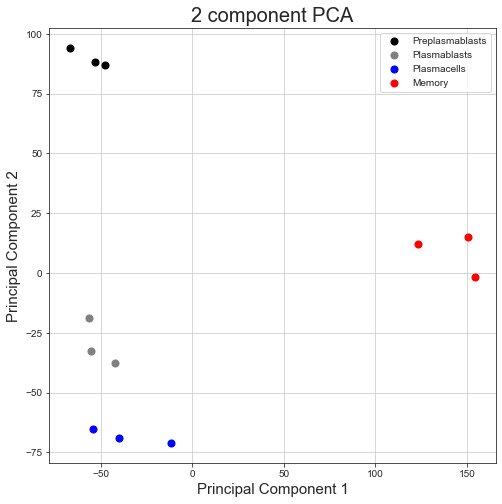

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Preplasmablasts', 'Plasmablasts', 'Plasmacells', 'Memory']
colors = ['black', 'gray', 'blue', 'red']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['index'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#plt.savefig('fig.png')